In [2]:
!pip install transformers
!git clone https://github.com/agiantwhale/jaegpt.git

     |████████████████████████████████| 2.5MB 7.7MB/s 
     |████████████████████████████████| 901kB 30.1MB/s 
     |████████████████████████████████| 3.3MB 31.6MB/s 
Cloning into 'jaegpt'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 54 (delta 26), reused 45 (delta 18), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [126]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from jaegpt.jaegpt import utils

matplotlib.rcParams['figure.figsize'] = (12, 10)
matplotlib.rcParams['font.size'] = 16

In [127]:
raw_data = utils.load_raw_messages("/content/drive/MyDrive/ColabData/input_data/final.json")
sent_data = utils.load_sent_messages(raw_data)

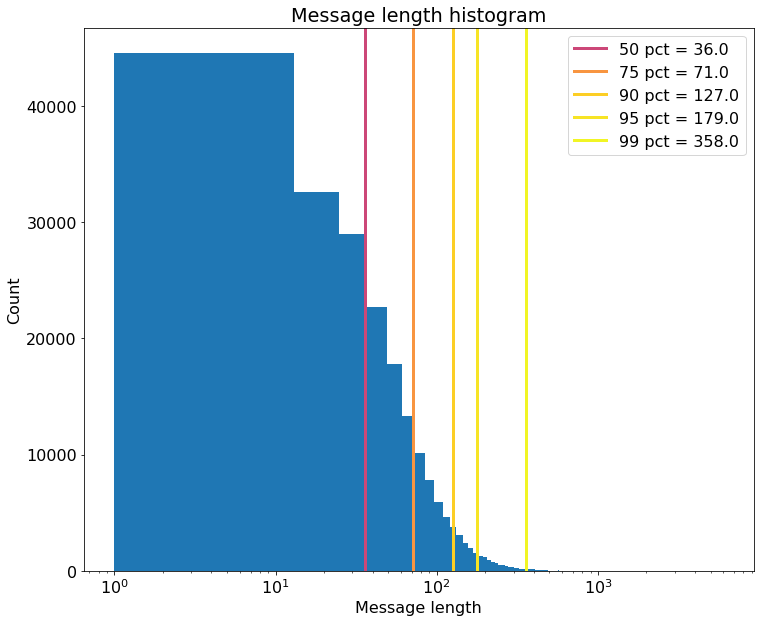

In [128]:
np_msg_lens = np.asarray([
    len(msg["content"])
    for chatlog in raw_data.values()
    for msg in chatlog["messages"]
])
np_msg_mask = np_msg_lens > 0
np_msg_lens = np_msg_lens[np_msg_mask]

percentiles = [50, 75, 90, 95, 99]

np_msg_pcts = np.percentile(np_msg_lens, percentiles)

fig, ax = plt.subplots()

ax.set_title("Message length histogram")
ax.set_xlabel("Message length")
ax.set_ylabel("Count")
ax.set_xscale('log', basex=10)
ax.hist(np_msg_lens, bins=500)

cmap = matplotlib.cm.get_cmap('plasma')
for pct, pct_len in zip(percentiles, np_msg_pcts):
    rgba = cmap(pct / 100.0)
    ax.axvline(pct_len, label=f'{pct} pct = {pct_len}', linestyle='-', c=rgba, linewidth=3)

ax.legend()

plt.show()